In [81]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
import seaborn
from tqdm import tqdm,tqdm_gui
from scipy.optimize import curve_fit
import sympy as sm
rcParams['figure.figsize'] = (12.0, 7.0)

In [82]:
def Bolzano(f,a0,b0,d):
    print((np.log(b0-a0)-np.log(2.*d))/np.log(2.))
    a=a0
    b=b0
    c=(a+b)/2
    i=0
    while np.abs(f(c))>d:
        print(i,c)
        if f(a)*f(c)<0.:
            b=c
        else:
            a=c
        c=(a+b)/2.
        i=i+1
    return c

## Εργασία 2
Δίνεται η  η συνάρτηση $f(x)= x^4+2x^3-5x^2-7x-5$ στο $[1.5,3]$. Να βρεθεί μία ρίζα:


Β) Εφαρμοζοντας την μέθοδο της διχοτόμησης  για  έξη επαναλήψεις 

Γ) Εφαρμοζοντας την μέθοδο του σταθερού σημείου για  έξη επαναλήψεις, ΑΛΛΑ βρήσκοντας σε κάθε βήμα την τιμή της συνάρτησης και της παραγώγου της με την μέθοδο διαίρεσης Horner

Δ) Πόσες επαναλήψεις πρέπει να γίνουν για το ανωτέρω διάστημα με την μέθοδο σταθερού σημείου ώστε 
$|x_n-x_{n+1}|<\epsilon$  όπου $\epsilon=0.5\times 10^{-5}$

Ε) Ποιά  μέδοδος δίνει καλύτερα αποτελέσματα και γιατί?

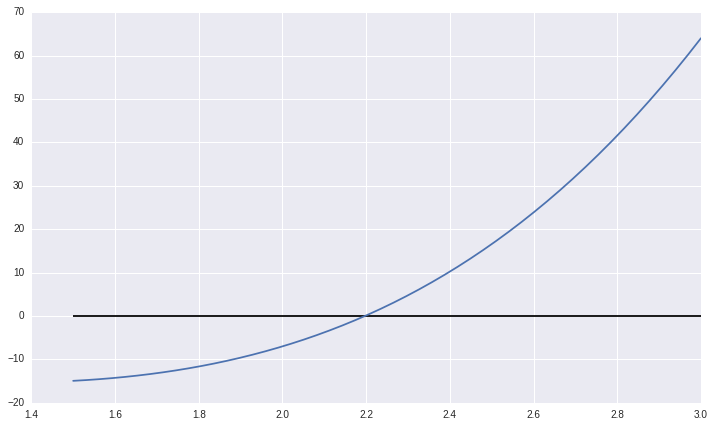

In [84]:
def f(x): return x**4+2.*x**3-5.*x**2-7.*x-5.
c=np.array([1.,2.,-5.,-7.,-5.])
xx=np.linspace(1.5,3)
plt.plot(xx,f(xx))
plt.hlines(0,xx[0],xx[-1])

In [85]:
def horner(x0, a):
    n = len(a)
    y = a[0]
    z = a[0]
    for j in range(1, n - 1):
        y = x0 * y + a[j]
        z = x0 * z + y
    y = x0 * y + a[-1]
    return y,z

In [113]:
xx=np.linspace(1.5,3,1000000) #Πίνακας με τις τιμές x, ακρίβεια τάξης 1e-6
p_h=np.array([horner(x,c)[0] for x in xx])#Πίνακας με τις τιμές του Πολυωνύμου όπως υπολογίστηκε απο τη μέθοδο Horner
der_h=np.array([horner(x,c)[1] for x in xx])#Πίνακας με τις τιμές της παραγώγου του Πολυωνύμου όπως υπολογίστηκε απο τη μέθοδο Horner
nr=p_h/der_h

In [117]:
guess=2.1 #Αρχική τιμή για τη μέθοδο Newton
x1=np.array([0.,guess]) #Τοποθετώ την αρχική τιμή σε ένα πίνακα
e=1e-6 #Παράμετρος προσέγγισης της τιμής x
n=0 #Αρχικοποίηση βήματος
while (np.abs(x1[-1]-x1[-2])>0.5e-5): #Όσο η ακρίβεια είναι μικρότερη από τη ζητούμενη
    print n, x1[-1],np.abs(x1[-1]-x1[-2]) #Εκτύπωση των αποτελεσμάτων
    x1=np.append(x1,x1[-1]-nr[np.logical_and(xx<x1[-1]+e,xx>x1[-1]-e)][0]) #Πρόσθεσε στο τέλος του Πίνακα x1 της νέα τιμής x_n+1
    n=n+1 #Αυξησε το βήμα
    if n>40: break 

0 2.1 2.1
1 2.20646514423 0.106465144231
2 2.19721629683 0.00924884739634
3 2.19714115064 7.51461911785e-05


In [122]:
Bolzano(f,1.5,3.,1e-3)

9.55074678538
(0, 2.25)
(1, 1.875)
(2, 2.0625)
(3, 2.15625)
(4, 2.203125)
(5, 2.1796875)
(6, 2.19140625)
(7, 2.197265625)
(8, 2.1943359375)
(9, 2.19580078125)
(10, 2.196533203125)
(11, 2.1968994140625)
(12, 2.19708251953125)
(13, 2.197174072265625)


2.1971282958984375

2)	Δίνεται η συνάρτηση $f(x)= 1-x^2$ στο διάστημα $[2,4]$

Α)Χρησιμοποιώντας την διακριτή μέθοδο των ελαχίστων τετραγώνων για τον πίνακα τιμών $[2, 2.5, 3, 3.5, 4]$  να βρείτε την καλύτερη προσέγγιση της με πολυώνυμο α’ βαθμού $ax+b$.

Β)Χρησιμοποιώντας την μέθοδο παρεμβολής για ισαπέχοντα σημεία υπολογίστε το πολυώνυμο που προκύπτει κρατώντας  τον πρώτο όρο μόνο.

Γ) Ποιά από της δύο μεθόδους δίνει καλύτερη ακρίβεια για την τιμή $x=2.2$ και γιατί?

In [141]:
def f(x): return 1.-x**2 #Ζητούμενη συναρτηση
d=np.array([2.,2.5,3.,3.5,4.]) #Δωσμενα σημεία
def g(x,a,b): return a*x+b #Γραμμική Συνάρτηση
def ph(x): return 6.-4.5*x #Γραμμική Συνάρτηση Παρεμβολής

In [142]:
coef,error2=curve_fit(g,d,f(d)) #Μέθοδος Ελαχιστων τετραγώνων

In [143]:
coef

array([-6. ,  9.5])

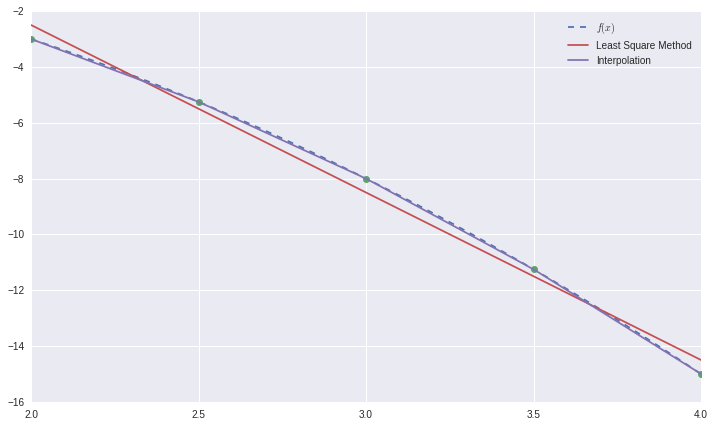

In [144]:
xx=np.linspace(2.,4.)
plt.plot(xx,f(xx),'--',label='$f(x)$')
plt.plot(d,f(d),'o')
plt.plot(xx,g(xx,coef[0],coef[1]),label='Least Square Method')
plt.plot(xx,interp(xx),label='Interpolation')
#plt.plot(xx,ph(xx),label='Interpolation')
plt.legend()

In [72]:
f(2.2),g(2.2,coef[0],coef[1]),ph(2.2)

(-3.8400000000000007, -3.7000000000150521, -3.9000000000000004)

In [74]:
np.abs(g(2.2,coef[0],coef[1])-f(2.2)),np.abs(ph(2.2)-f(2.2))

(0.13999999998494861, 0.059999999999999609)

3)	Δίνεται η συνάρτηση $f(x)=1/x$ στο διάστημα $[1.3]$

Α) Χρησιμοποιώντας την συνεχή μέθοδο των ελαχίστων τετραγώνων να βρείτε το καλύτερο  πολυώνυμο β’ βαθμού που την προσεγγίζει σ΄αυτό το διάστημα.

Β)Χρησιμοποιώντας τα σημεία $x_0=1,  x_1 =1.5,  x_2=2, x_3=2.5$  να βρείτε το πολυώνυμο παρεμβολής Lagrange γ’ βαθμού που προσεγγίζει την συνάρτηση.

Γ)Σχεδιάστε την συνάρτηση και τα δύο παραπάνω πολυώνημα προσέγγισης, Ποιό προσεγγίζει καλύτερα την συνάρτηση?

In [136]:
def f(x): return 1./x
xx=np.linspace(1.,3.)
def g(x): 
    a=(236.-219.*np.log(3))/254.
    b=(3.*(213.*np.log(3)-193.))/127.
    c=-(15.*(17.*np.log(3)-16))/127.
    return a+b*x+c*x**2
def l(x): return (-2./15)*x**3+(14./15.)*x**2-(71./30.)*x+77./30. 

In [137]:
d=np.array([1.,1.5,2.,2.5])
d,f(d)

(array([ 1. ,  1.5,  2. ,  2.5]),
 array([ 1.        ,  0.66666667,  0.5       ,  0.4       ]))

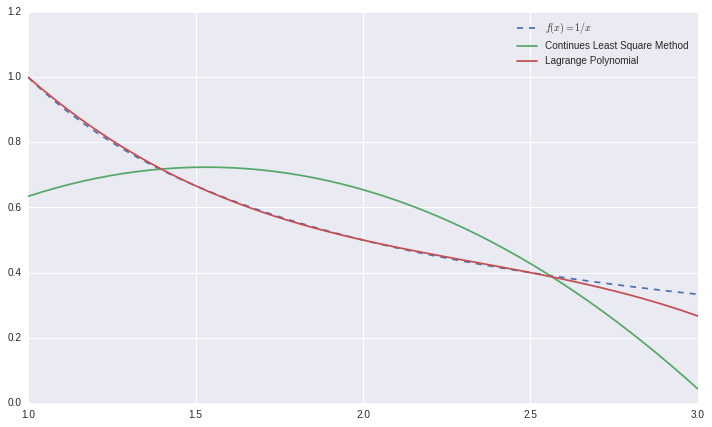

In [139]:
plt.plot(xx,f(xx),'--',label='$f(x)=1/x$')
plt.plot(xx,g(xx),label='Continues Least Square Method')
plt.plot(xx,l(xx),label='Lagrange Polynomial')
plt.legend()